In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE

# for showing all the columns

pd.options.display.max_columns = 31

In [2]:
# uploading the data set - later integrate the Kaggle API and use data directly from Kaggle

df = pd.read_csv('creditcard.csv')

In [ ]:
# RobustScaler will be used
scaler_rob = RobustScaler()

df['Time_scaled'] = scaler_rob.fit_transform(df['Time'].values.reshape(-1,1))
df['Amount_scaled'] = scaler_rob.fit_transform(df['Amount'].values.reshape(-1,1))

df.drop(['Time','Amount'],axis =1, inplace = True)
# adjusting the column order for better visibility
cols_to_move = df.columns[-2:].tolist()
remaining_cols = df.columns[:-2].tolist()
new_col_order =  cols_to_move + remaining_cols
df = df[new_col_order]
df.head()

,Time_scaled,Amount_scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


## SMOTE

In [ ]:

# Define features (X) and target (y)
X = df.drop('Class', axis=1)  # Assuming 'Class' is the target variable
y = df['Class']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check class distribution before applying SMOTE
from collections import Counter
print("Before SMOTE:", Counter(y_train))


Before SMOTE: Counter({0: 227451, 1: 394})


In [ ]:


# Initialize SMOTE with a 50-50 balance (you can adjust it)
smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("After SMOTE:", Counter(y_train_smote))


After SMOTE: Counter({0: 227451, 1: 113725})


## XGboost Vs Neuarl Network

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification output
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, validation_data=(X_test, y_test), epochs=20, batch_size=512)


Epoch 1/20


c:\Users\Chinmay\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


667/667 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9441 - loss: 0.1518 - val_accuracy: 0.9951 - val_loss: 0.0174
Epoch 2/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9916 - loss: 0.0243 - val_accuracy: 0.9973 - val_loss: 0.0117
Epoch 3/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9965 - loss: 0.0123 - val_accuracy: 0.9983 - val_loss: 0.0104
Epoch 4/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9980 - loss: 0.0080 - val_accuracy: 0.9987 - val_loss: 0.0100
Epoch 5/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9985 - loss: 0.0057 - val_accuracy: 0.9986 - val_loss: 0.0112
Epoch 6/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9987 - loss: 0.0054 - val_accuracy: 0.9989 - val_loss: 0.0114
Epoch 7/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 0.9988 - val_loss: 0.0126
Epoch 8/20
667/667 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9989 - loss: 0.0046 - val_accuracy: 0.9990 - val_

In [ ]:


# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Evaluate performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962

[[56830    34]
 [   16    82]]


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 364us/step
Neural Network Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.85      0.92      0.88     56962
weighted avg       1.00      1.00      1.00     56962



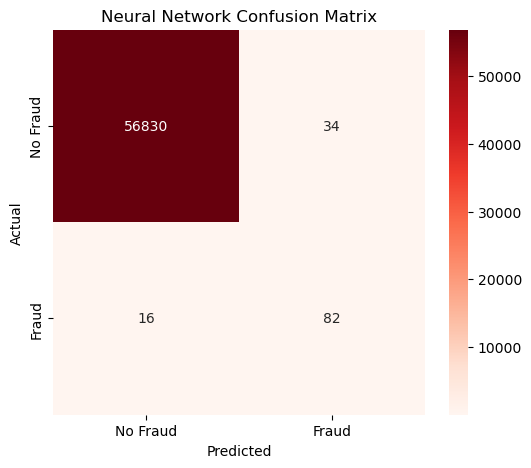

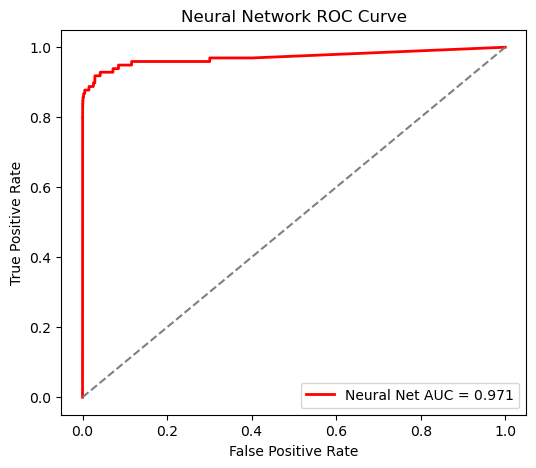

In [8]:
# Generate Predictions for Neural Network
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")  # Keep default threshold = 0.5
y_pred_nn_proba = model.predict(X_test).flatten()  # Get probabilities for ROC curve

# Confusion Matrix
cm_nn = confusion_matrix(y_test, y_pred_nn)

# Print Classification Report
print("Neural Network Classification Report:\n", classification_report(y_test, y_pred_nn))

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Reds", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neural Network Confusion Matrix")
plt.show()

# AUC-ROC Curve
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_nn_proba)
roc_auc_nn = auc(fpr_nn, tpr_nn)

plt.figure(figsize=(6,5))
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Net AUC = {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Neural Network ROC Curve')
plt.legend()
plt.show()


In [9]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=500,       # Number of trees
    learning_rate=0.05,     # Step size shrinkage
    max_depth=6,            # Maximum depth of each tree
    subsample=0.8,          # Row sampling
    colsample_bytree=0.8,   # Feature sampling per tree
    scale_pos_weight=5,     # Adjust weight to balance classes
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Train the model (without early stopping)
xgb_model.fit(X_train_smote, y_train_smote, eval_set=[(X_test, y_test)], verbose=True)

# Make predictions (default threshold = 0.5)
y_pred_xgb = xgb_model.predict(X_test)


[0]	validation_0-logloss:1.10898
[1]	validation_0-logloss:1.02608
[2]	validation_0-logloss:0.95298
[3]	validation_0-logloss:0.88782
[4]	validation_0-logloss:0.82927
[5]	validation_0-logloss:0.77669
[6]	validation_0-logloss:0.72938
[7]	validation_0-logloss:0.68611
[8]	validation_0-logloss:0.64829
[9]	validation_0-logloss:0.61296
[10]	validation_0-logloss:0.57991
[11]	validation_0-logloss:0.54927
[12]	validation_0-logloss:0.52198
[13]	validation_0-logloss:0.49542
[14]	validation_0-logloss:0.47085
[15]	validation_0-logloss:0.44824
[16]	validation_0-logloss:0.42804
[17]	validation_0-logloss:0.40817
[18]	validation_0-logloss:0.38968
[19]	validation_0-logloss:0.37269
[20]	validation_0-logloss:0.35702
[21]	validation_0-logloss:0.34229
[22]	validation_0-logloss:0.32792
[23]	validation_0-logloss:0.31497
[24]	validation_0-logloss:0.30195
[25]	validation_0-logloss:0.29036
[26]	validation_0-logloss:0.27889
[27]	validation_0-logloss:0.26781
[28]	validation_0-logloss:0.25761
[29]	validation_0-loglos

In [10]:
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.86      0.74        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962

[[56819    45]
 [   14    84]]


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.86      0.74        98

    accuracy                           1.00     56962
   macro avg       0.83      0.93      0.87     56962
weighted avg       1.00      1.00      1.00     56962



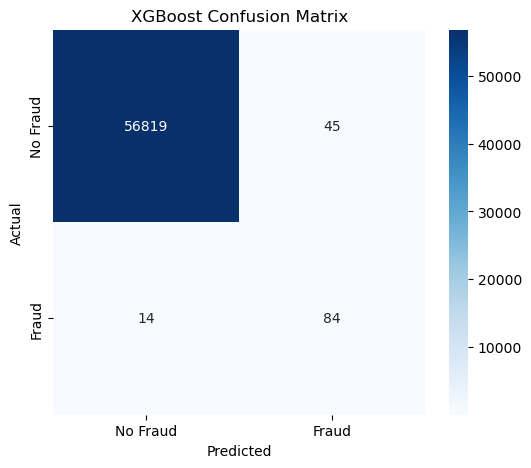

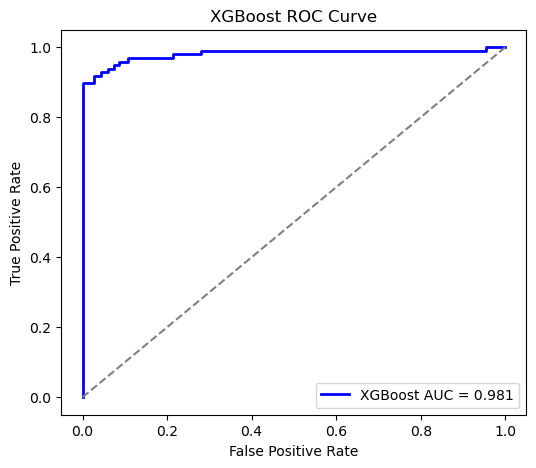

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Generate Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print Classification Report
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))

# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=["No Fraud", "Fraud"], yticklabels=["No Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost Confusion Matrix")
plt.show()

# AUC-ROC Curve
y_pred_xgb_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities

fpr, tpr, _ = roc_curve(y_test, y_pred_xgb_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost AUC = {roc_auc:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend()
plt.show()


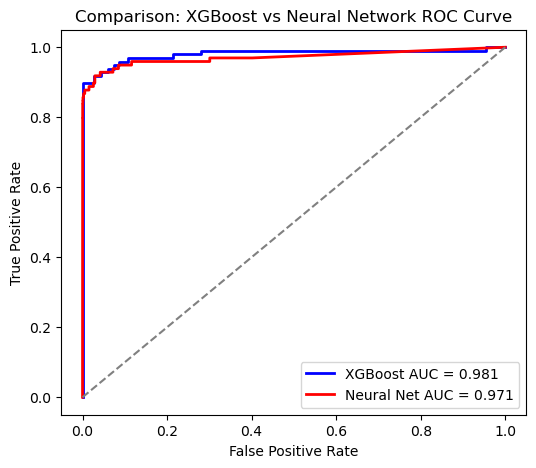

In [12]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'XGBoost AUC = {roc_auc:.3f}')
plt.plot(fpr_nn, tpr_nn, color='red', lw=2, label=f'Neural Net AUC = {roc_auc_nn:.3f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison: XGBoost vs Neural Network ROC Curve')
plt.legend()
plt.show()
